In [6]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10


16/16 [==============================] - 1s 7ms/step - loss: 0.7050 - accuracy: 0.4563
Epoch 2/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5500
Epoch 4/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5625
Epoch 5/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6847 - accuracy: 0.5938
Epoch 6/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6806 - accuracy: 0.6062
Epoch 7/10
16/16 [==============================] - 0s 6ms/step - loss: 0.6766 - accuracy: 0.6062
Epoch 8/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6721 - accuracy: 0.6438
Epoch 9/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6678 - accuracy: 0.6562
Epoch 10/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6639 - accuracy: 0.6438


In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 14ms/step - loss: 0.6464 - accuracy: 0.7250
Test Accuracy: 0.7250000238418579


Epoch 1/10
13/13 [==============================] - 1s 23ms/step - loss: 0.6608 - accuracy: 0.6406 - val_loss: 0.6534 - val_accuracy: 0.6562
Epoch 2/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6579 - accuracy: 0.6641 - val_loss: 0.6490 - val_accuracy: 0.6562
Epoch 3/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6545 - accuracy: 0.6641 - val_loss: 0.6451 - val_accuracy: 0.6875
Epoch 4/10
13/13 [==============================] - 0s 16ms/step - loss: 0.6511 - accuracy: 0.6797 - val_loss: 0.6411 - val_accuracy: 0.6875
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.6482 - accuracy: 0.6953 - val_loss: 0.6372 - val_accuracy: 0.7188
Epoch 6/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6447 - accuracy: 0.6875 - val_loss: 0.6325 - val_accuracy: 0.7188
Epoch 7/10
13/13 [==============================] - 0s 12ms/step - loss: 0.6414 - accuracy: 0.6875 - val_loss: 0.6287 - val_accuracy: 0.7500
Epoch 8/10
13

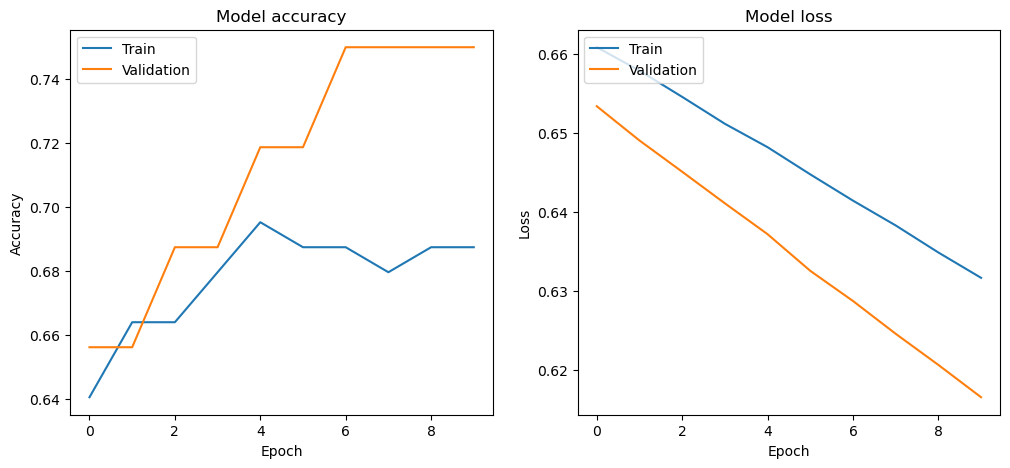

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 2s 5ms/step


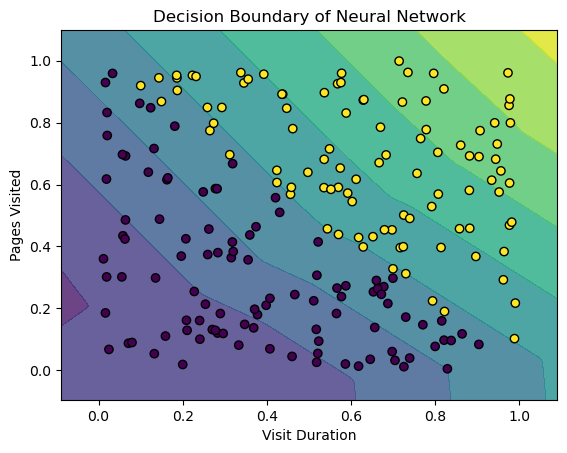

In [11]:
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()